# Step Forward, Step Backward and Exhaustive Feature Selection | Wrapper Method

### Watch it Here: https://youtu.be/zW1SvA0Z-l4
### Watch Full Playlist: https://www.youtube.com/playlist?list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Use of mlxtend in Wrapper Method 

In [20]:
!pip install mlxtend

More Information Available at
http://rasbt.github.io/mlxtend/

#### How it works 

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. 

In a nutshell, SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached. There are 4 different flavors of SFAs available via the SequentialFeatureSelector:

- Sequential Forward Selection (SFS)
- Sequential Backward Selection (SBS)
- Sequential Forward Floating Selection (SFFS)
- Sequential Backward Floating Selection (SBFS)

#### Step Forward Selection (SFS) 

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [23]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [24]:
data = load_wine()

In [25]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [26]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [27]:
X = pd.DataFrame(data.data)
y = data.target

In [28]:
X.columns = data.feature_names
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((142, 13), (36, 13))

### Step Forward Feature Selection (SFS) 

In [31]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   13.5s finished

[2021-03-06 06:48:25] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.0s finished

[2021-03-06 06:48:36] Features: 2/7 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.5s finished

[2021-03-06 06:48:47] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.3s finished

[2021-03-06 06:48:56] Features: 4/7 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    8.8s finished

[202

In [32]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'magnesium',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'proline')

In [33]:
sfs.k_feature_idx_

(0, 2, 4, 6, 8, 9, 12)

In [34]:
sfs.k_score_

0.9791666666666666

In [35]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.76746,"(flavanoids,)",0.0670901,0.0418533,0.024164
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.971825,"(flavanoids, color_intensity)",0.031492,0.0196459,0.0113425
3,"(4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(magnesium, flavanoids, color_intensity)",0.0225862,0.0140901,0.00813492
4,"(4, 6, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(magnesium, flavanoids, color_intensity, proline)",0.0194714,0.012147,0.00701308
5,"(2, 4, 6, 9, 12)","[0.9444444444444444, 0.9722222222222222, 0.971...",0.972024,"(ash, magnesium, flavanoids, color_intensity, ...",0.0314903,0.0196449,0.011342
6,"(2, 4, 6, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(ash, magnesium, flavanoids, proanthocyanins, ...",0.0194714,0.012147,0.00701308
7,"(0, 2, 4, 6, 8, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(alcohol, ash, magnesium, flavanoids, proantho...",0.0369201,0.0230321,0.0132976


In [37]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   12.9s finished

[2021-03-06 06:53:40] Features: 1/8 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.5s finished

[2021-03-06 06:53:52] Features: 2/8 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.1s finished

[2021-03-06 06:54:03] Features: 3/8 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.5s finished

[2021-03-06 06:54:12] Features: 4/8 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    9.0s finished

[202

In [38]:
sfs.k_score_

0.9859126984126985

In [39]:
sfs.k_feature_names_

('magnesium', 'flavanoids', 'color_intensity')

### Step Backward Selection (SBS) 

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.0s finished

[2019-08-24 19:08:35] Features: 12/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.0s finished

[2019-08-24 19:08:38] Features: 11/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.0s finished

[2019-08-24 19:08:41] Features: 10/1 -- score: 0.9862987987987988[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished

[2019-08-24 19:08:44] Features: 9/1 -- score: 0.993

In [ ]:
sbs = sfs

In [ ]:
sbs.k_score_

0.9932432432432432

In [ ]:
sbs.k_feature_names_

('alcohol',
 'malic_acid',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'color_intensity')

### Exhaustive Feature Selection (EFS) 

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)

Features: 2002/2002

C(13, 4) + C(13, 5) = 715 + 1287

In [ ]:
715 + 1287

2002

In [ ]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [ ]:
efs.best_score_

1.0

In [ ]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [ ]:
efs.best_idx_

(0, 1, 2, 3)

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


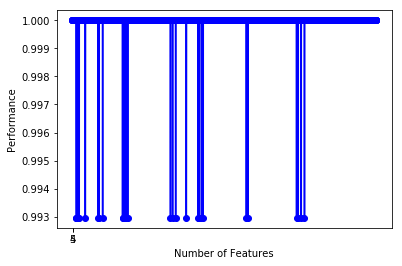

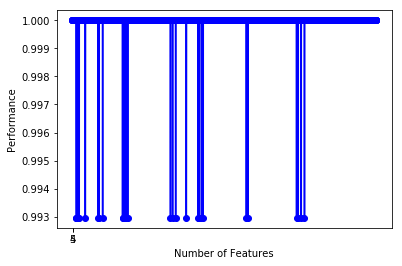

In [ ]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')